In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [115]:
data = pd.read_csv('optimistic-rescheduling-stats-7x7-20230715232451.csv')
data = data.sort_values(by=['N'])
x = data.iloc[:, 1].values.reshape(-1, 1)
y = data.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

data.head()

,N,K,Samples,Avg Runtime,Max Runtime,Total Runtime,Std Dev
5,14,4,2,0.015957,0.020959,0.031915,0.005001
8,20,6,2,0.281517,0.479294,0.563033,0.197777
10,26,8,4,0.079683,0.207178,0.318733,0.073668
9,26,8,4,0.041977,0.061934,0.167908,0.012149
12,32,10,2,0.065568,0.072036,0.131136,0.006468


In [116]:
x.transpose()[0]

array([ 4,  6,  8,  8, 10, 10, 12, 12, 12, 12, 12, 12, 14, 14, 14, 16, 16,
       18, 20, 20, 24, 24, 24, 24, 28, 28, 30, 30, 32, 32, 36, 36, 40, 40,
       42, 42, 48, 56, 56, 56, 60, 60, 70, 70, 72, 84, 84, 84, 98])

In [117]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

linear_regressor = LinearRegression()
linear_regressor.fit(poly_features, y)
# linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(poly_features)  # make predictions

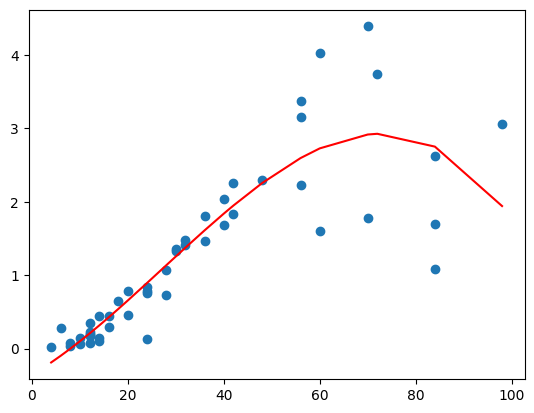

In [118]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [119]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(x, y_pred)


LinearRegression()

In [120]:
poly_reg_rmse = np.sqrt(mean_squared_error(y, y_pred))
poly_reg_rmse

0.5482179472681714

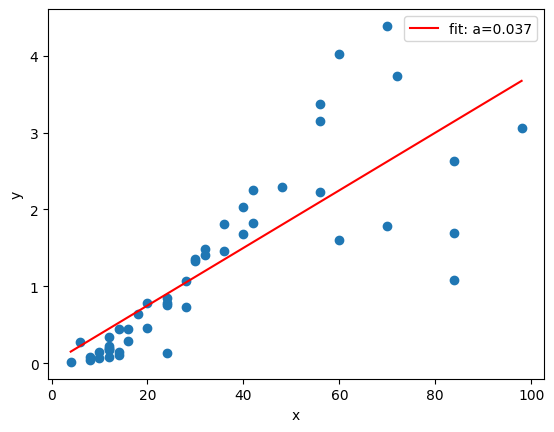

In [133]:
plt.scatter(x, y)
# plt.plot(x, y, 'b-', label='data')

def pred_n(x, a):
  return a * x

def pred_n2(x, a):
  return a * x**2

# (1/4) N (N + 1)^2
def pred_avg_of_n3(x, a):
  return a * x * (x + 1)**2

# (1/6) (N + 1) (2N + 1)
def pred_avg_of_n2(x, a):
  return a * (x + 1) * (2 * x + 1)

popt, pcov = curve_fit(pred_n, x.transpose()[0], y.transpose()[0])

plt.plot(x.transpose()[0], pred_n(x.transpose()[0], *popt), 'r-', label='fit: a=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [134]:
coefficient_of_dermination = r2_score(y, pred_n(x.transpose()[0], *popt))
coefficient_of_dermination

0.6658642589414631

In [102]:
np.linalg.cond(pcov)

1.0